In [2]:
import os
import pandas as pd
from tqdm import tqdm
from scipy.stats import norm, ecdf

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("../../data/Cars/cars.csv")
df.describe()
df

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,NaN,0.0,1.0,1.0,Apple Tree Acura,NaN,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,NaN,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762086,Volvo,S60 B5 Momentum,2022,22877.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,25-33,Bright Silver Metallic,Blond,0.0,1.0,0.0,Volvo Cars Danbury,4.2,4.2,2.0,250.0,34798.0
762087,Volvo,S60 T5,2012,72900.0,250.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,A/T,Front-wheel Drive,Gasoline,NaN,Red,Beige,NaN,NaN,NaN,NaN,NaN,4.5,101.0,NaN,12500.0
762088,Volvo,S60 T5,2014,92000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,Front-wheel Drive,Gasoline,21-30,Ice White,Soft Beige,0.0,0.0,1.0,Dapper Car Sales,NaN,4.8,36.0,300.0,12299.0
762089,Volvo,S60 T5 Platinum,2013,132000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,All-wheel Drive,Gasoline,20-29,Ice White,Off Black,1.0,0.0,0.0,Legend Auto Sales Inc.,4.6,4.7,62.0,1000.0,8995.0


In [15]:
# Filter the DataFrame to only include rows where the manufacturer is Volvo
df_volvo = df[df['manufacturer'] == 'Volvo']
# print(df_volvo)
# Calculate the mean price
mean_price = round(df_volvo['price'].mean())

print(mean_price)

# Find the index of the car with the price closest to the mean price
index_nearest_to_mean = (df_volvo['price'] - mean_price).abs().idxmin()

# Display the car with the price closest to the mean price
print(df_volvo.loc[index_nearest_to_mean])

35800
manufacturer                             Volvo
model                         XC40 T4 Momentum
year                                      2021
mileage                                20089.0
engine                                 I-4 cyl
transmission                               NaN
drivetrain                   Front-wheel Drive
fuel_type                             Gasoline
mpg                                        NaN
exterior_color                     Black Stone
interior_color                             NaN
accidents_or_damage                        0.0
one_owner                                  1.0
personal_use_only                          0.0
seller_name            Volvo Cars of Nashville
seller_rating                              NaN
driver_rating                              4.7
driver_reviews_num                        35.0
price_drop                                 NaN
price                                  35800.0
Name: 756158, dtype: object


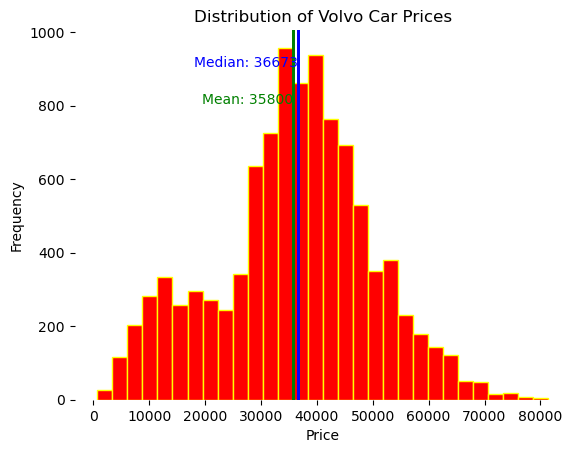

The range of prices for Volvo cars in the dataset is from 695.0 to 81400.0.


In [26]:
# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot a histogram of the prices of Volvo cars with red bars
ax.hist(df_volvo['price'], bins=30, color='red', edgecolor='yellow')

# Calculate the median and mean prices
median_price = df_volvo['price'].median()
mean_price = df_volvo['price'].mean()

# Add vertical lines for the median and mean prices
ax.axvline(median_price, color='blue',  linewidth=2, label=f'Median: {median_price}')
ax.axvline(mean_price, color='green', linewidth=2, label=f'Mean: {mean_price}')

# Calculate the median and mean prices
median_price = df_volvo['price'].median()
mean_price = df_volvo['price'].mean()

# Add vertical lines for the median and mean prices
ax.axvline(median_price, color='blue',  linewidth=2)
ax.axvline(mean_price, color='green', linewidth=2)

# Add labels for the median and mean prices
ax.text(median_price, ax.get_ylim()[1]*0.9, f'Median: {round(median_price)}', color='blue', ha='right')
ax.text(mean_price, ax.get_ylim()[1]*0.8, f'Mean: {round(mean_price)}', color='green', ha='right')

# Set the title and labels
ax.set_title('Distribution of Volvo Car Prices')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')

# Remove the spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove the grid lines
ax.grid(False)

# Display the plot
plt.show()
# Calculate the minimum and maximum prices
min_price = df_volvo['price'].min()
max_price = df_volvo['price'].max()

# Print the range of prices
print(f'The range of prices for Volvo cars in the dataset is from {min_price} to {max_price}.')

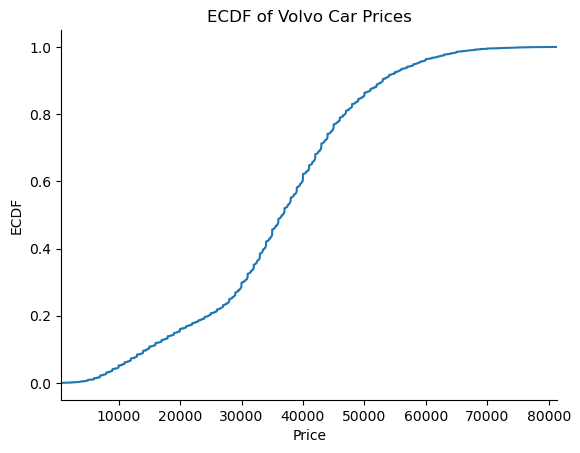

In [30]:
# Calculate ECDF
x = np.sort(df_volvo['price'])
y = np.arange(1, len(x)+1) / len(x)

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the ECDF
ax.plot(x, y)
ax.set_title('ECDF of Volvo Car Prices')
ax.set_xlabel('Price')
ax.set_ylabel('ECDF')



# Set the limits of the x-axis
ax.set_xlim([x.min(), x.max()])

# Remove the spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Remove the grid lines
ax.grid(False)

# Display the plot
plt.show()

['Hybrid' 'Plug-In Hybrid' 'Gasoline' 'Gasoline Fuel' 'Premium Unleaded'
 'Gasoline/Mild Electric Hybrid' nan 'Regular Unleaded' 'Electric'
 'Hybrid Fuel' 'G' 'Plug-In Electric/Gas' 'Gas']
['Hybrid' 'Gasoline' nan 'Electric']


C:\Users\BartVrancken\AppData\Local\Temp\ipykernel_12956\2702502008.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_volvo['fuel_type_3cat'] = df_volvo['fuel_type'].apply(lambda x: 'Electric' if x in electric else ('Hybrid' if x in hybrid else ('Gasoline' if x in gasoline else x)))


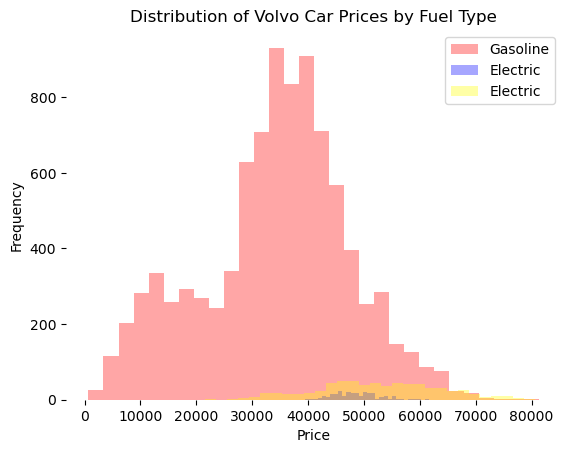

In [42]:
print(df_volvo['fuel_type'].unique())


# Define the categories
electric = ['Electric']
hybrid = ['Hybrid', 'Plugin Hybrid',"Plug-In Hybrid",'Gasoline/Mild Electric Hybrid', 'Hybrid Fuel', 'G', 'Plug-In Electric/Gas']
gasoline = ['Gasoline',"Gas", 'Gasoline Fuel', 'Premium Unleaded', 'Regular Unleaded']

# Categorize the 'fuel_type' column
df_volvo['fuel_type_3cat'] = df_volvo['fuel_type'].apply(lambda x: 'Electric' if x in electric else ('Hybrid' if x in hybrid else ('Gasoline' if x in gasoline else x)))

# Print the unique values of the 'fuel_type' column
print(df_volvo['fuel_type_3cat'].unique())


# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot a histogram of the prices of gasoline Volvo cars with red bars
ax.hist(df_volvo[df_volvo['fuel_type_3cat'] == 'Gasoline']['price'], bins=30, color='red', alpha=0.35, label='Gasoline')

# Plot a histogram of the prices of electric Volvo cars with blue bars
ax.hist(df_volvo[df_volvo['fuel_type_3cat'] == 'Electric']['price'], bins=30, color='blue', alpha=0.35, label='Electric')

# Plot a histogram of the prices of Hybrid Volvo cars with yellow bars
ax.hist(df_volvo[df_volvo['fuel_type_3cat'] == 'Hybrid']['price'], bins=30, color='yellow', alpha=0.35, label='Electric')

# Set the title and labels
ax.set_title('Distribution of Volvo Car Prices by Fuel Type')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')

# Remove the spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove the grid lines
ax.grid(False)

# Add a legend
ax.legend()

# Display the plot
plt.show()

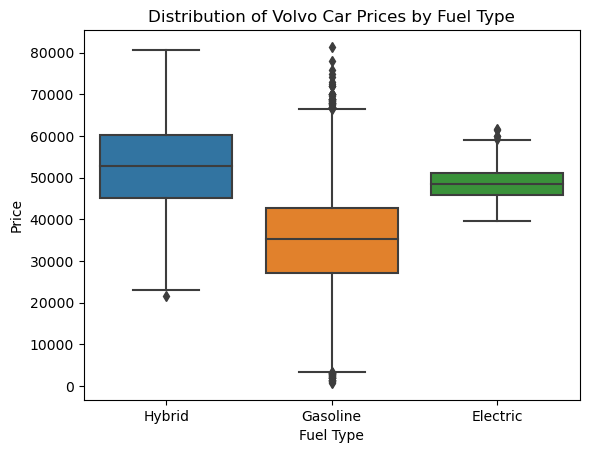

In [43]:
import seaborn as sns

# Create a boxplot of the prices by fuel type
sns.boxplot(x='fuel_type_3cat', y='price', data=df_volvo)

# Set the title and labels
plt.title('Distribution of Volvo Car Prices by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')

# Display the plot
plt.show()